### Strong Scalability

In [6]:
import subprocess
import re

tot_time_array=[]
par_time_array=[]
tot_minimum_array=[]
par_minimum_array=[]

for i in range(1,7):
    temp = []
    temp2 = []
    print(i)
    for j in range(10):
        cmd = [
            "time",
            "mpirun",
            "-n", str(i),
            "../src/main",
            "../src/output100000.csv",
            "2"
        ]

        result = subprocess.run(
            cmd,
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            text=True
        )

        program_output = result.stdout     # output from your C++ program
        timing_output = result.stderr      # time + MPI diagnostics
        return_code = result.returncode

        #print("Return code:", return_code)
        #print("Program output:\n", program_output)
        #print("Timing info:\n", timing_output)

        match = re.search(r"Elapsed time Total:\s*([\d.]+)", program_output)
        match2 = re.search(r"Elapsed time Parallel:\s*([\d.]+)", program_output)
        if match2:
            elapsed_par = float(match2.group(1))
            #print(elapsed_par)   
            temp2.append(elapsed_par)
        if match:
            elapsed_tot = float(match.group(1))
            #print(elapsed_tot)   
            temp.append(elapsed_tot)
    tot_time_array.append(temp)
    par_time_array.append(temp2)
    min1 = min(temp)
    print("minimum total: "+str(min1))
    tot_minimum_array.append(min1)
    min2 = min(temp2)
    print("minimum parallel: "+str(min2))
    par_minimum_array.append(min2)

1
minimum total: 0.256046
minimum parallel: 0.197936
2
minimum total: 0.132997
minimum parallel: 0.080932
3
minimum total: 0.101861
minimum parallel: 0.0501861
4
minimum total: 0.101604
minimum parallel: 0.0458835
5
minimum total: 0.0951388
minimum parallel: 0.0423115
6
minimum total: 0.0934333
minimum parallel: 0.0380422


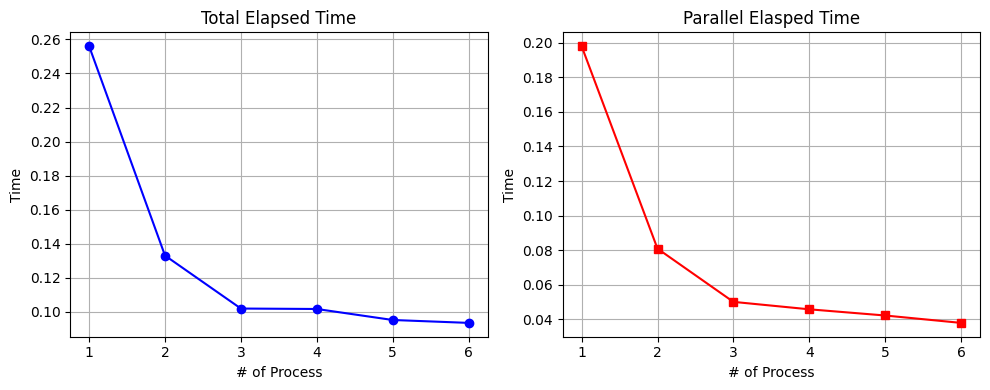

In [7]:
import matplotlib.pyplot as plt

x = list(range(1,len(tot_minimum_array)+1))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

# First graph
ax1.plot(x, tot_minimum_array, marker='o', color='blue')
ax1.set_xlabel("# of Process")
ax1.set_ylabel("Time")
ax1.set_title("Total Elapsed Time")
ax1.grid(True)

# Second graph
ax2.plot(x, par_minimum_array, marker='s', color='red')
ax2.set_xlabel("# of Process")
ax2.set_ylabel("Time")
ax2.set_title("Parallel Elasped Time")
ax2.grid(True)

plt.tight_layout()  # avoid overlapping labels
plt.show()

### Weak Scalability

In [8]:
import subprocess
import re

tot_time_array=[]
par_time_array=[]
tot_minimum_array=[]
par_minimum_array=[]

for i in range(1,7): #iterate over number of processors
    temp = []
    temp2 = []
    print(i)
    for j in range(10): #number of time the program is tested with each processor
        cmd = [
            "time",
            "mpirun",
            "-n", str(i),
            "../src/main",
            "../src/output"+str(i)+"00000.csv",
            "2"
        ]

        result = subprocess.run(
            cmd,
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            text=True
        )

        program_output = result.stdout     # output from your C++ program
        timing_output = result.stderr      # time + MPI diagnostics
        return_code = result.returncode

        #print("Return code:", return_code)
        #print("Program output:\n", program_output)
        #print("Timing info:\n", timing_output)

        match = re.search(r"Elapsed time Total:\s*([\d.]+)", program_output)
        match2 = re.search(r"Elapsed time Parallel:\s*([\d.]+)", program_output)
        if match2:
            elapsed_par = float(match2.group(1))
            #print(elapsed_par)   
            temp2.append(elapsed_par)
        if match:
            elapsed_tot = float(match.group(1))
            #print(elapsed_tot)   
            temp.append(elapsed_tot)
    tot_time_array.append(temp)
    par_time_array.append(temp2)
    min1 = min(temp)
    print("minimum total: "+str(min1))
    tot_minimum_array.append(min1)
    min2 = min(temp2)
    print("minimum parallel: "+str(min2))
    par_minimum_array.append(min2)

1
minimum total: 0.208179
minimum parallel: 0.155622
2
minimum total: 0.264864
minimum parallel: 0.162849
3
minimum total: 0.341004
minimum parallel: 0.185325
4
minimum total: 0.525657
minimum parallel: 0.260282
5
minimum total: 0.608972
minimum parallel: 0.305817
6
minimum total: 0.745094
minimum parallel: 0.311643


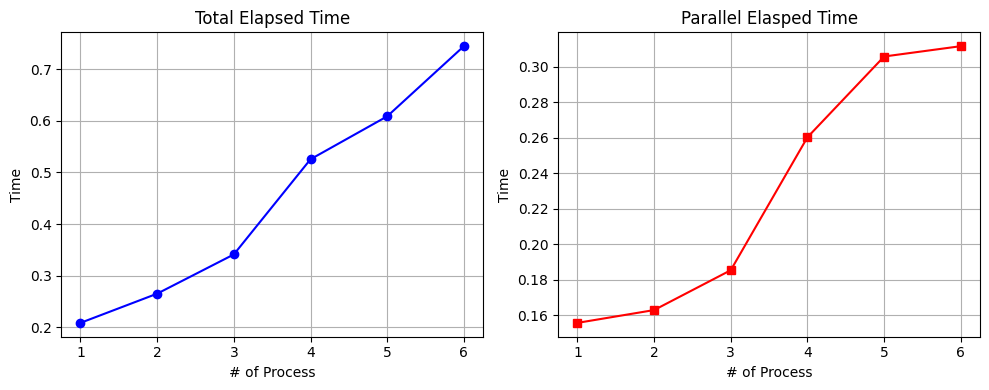

In [9]:
import matplotlib.pyplot as plt

x = list(range(1,len(tot_minimum_array)+1))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

# First graph
ax1.plot(x, tot_minimum_array, marker='o', color='blue')
ax1.set_xlabel("# of Process")
ax1.set_ylabel("Time")
ax1.set_title("Total Elapsed Time")
ax1.grid(True)

# Second graph
ax2.plot(x, par_minimum_array, marker='s', color='red')
ax2.set_xlabel("# of Process")
ax2.set_ylabel("Time")
ax2.set_title("Parallel Elasped Time")
ax2.grid(True)

plt.tight_layout()  # avoid overlapping labels
plt.show()